# Modelling the interval of Low and High with VARIMAX

# Imports

In [44]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

# Monthly data

Load datasets

In [45]:
monthly_M2_SP = pd.read_csv('./data/monthly_M2_SP.csv')
monthly_M2_SP['Date'] =  pd.to_datetime(monthly_M2_SP['Date'], format='%Y-%m-%d')
monthly_M2_SP.set_index('Date', inplace=True)
monthly_M2_SP

,Open,High,Low,Close,Volume,M2NS
Date,,,,,,
1980-11-01,127.47,141.96,127.23,140.52,5.489500e+08,1599.0
1980-12-01,140.52,140.66,125.32,135.76,5.698056e+08,1604.8
1981-01-01,135.76,140.32,128.57,129.55,5.308444e+08,1610.6
1981-02-01,129.48,132.02,124.66,131.27,4.535056e+08,1610.5
1981-03-01,131.27,138.38,128.56,136.00,6.525167e+08,1633.2
...,...,...,...,...,...,...
2022-10-01,3609.78,3905.42,3491.58,3871.98,5.678654e+10,21380.1
2022-11-01,3901.79,4080.11,3698.15,4080.11,5.230904e+10,21378.7
2022-12-01,4087.14,4100.96,3764.49,3839.50,4.845613e+10,21400.0


# Seasonality

<Axes: xlabel='Date'>

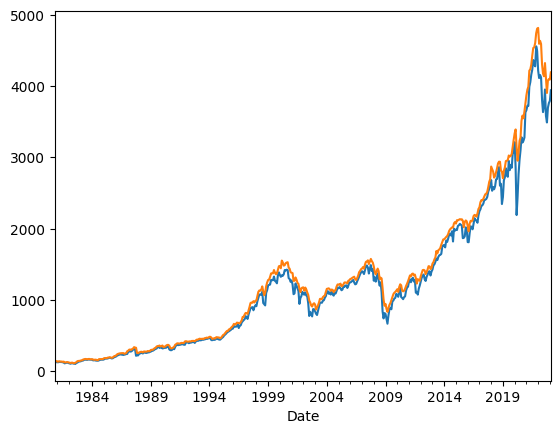

In [46]:
monthly_M2_SP['Low'].plot()
monthly_M2_SP['High'].plot()

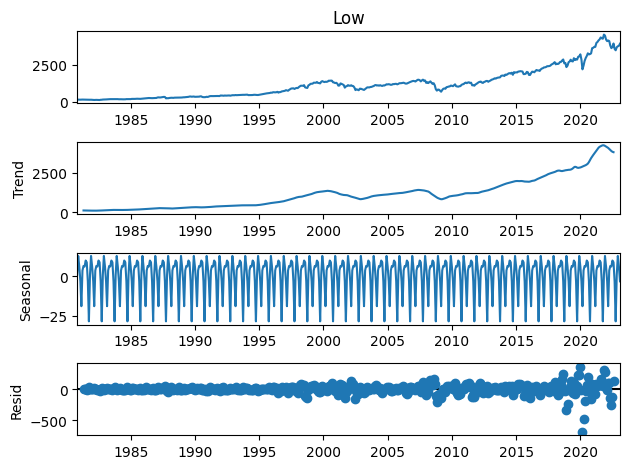

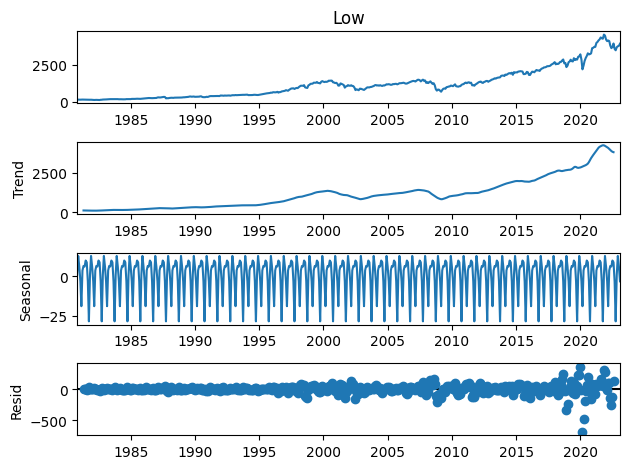

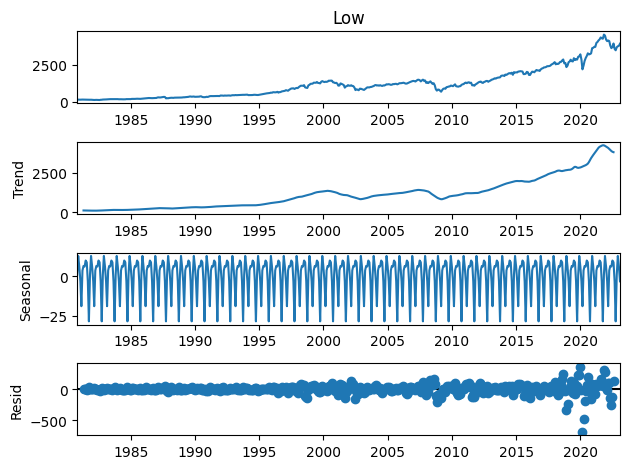

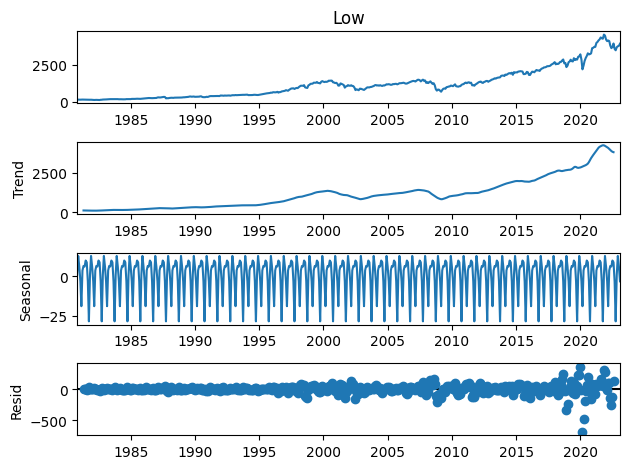

In [47]:
display(sm.tsa.seasonal_decompose(monthly_M2_SP['Low'],model='additive').plot())
display(sm.tsa.seasonal_decompose(monthly_M2_SP['Low'],model='additive').plot())
# sm.tsa.seasonal_decompose(monthly_M2_SP['Low'],model='additive').seasonal.plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

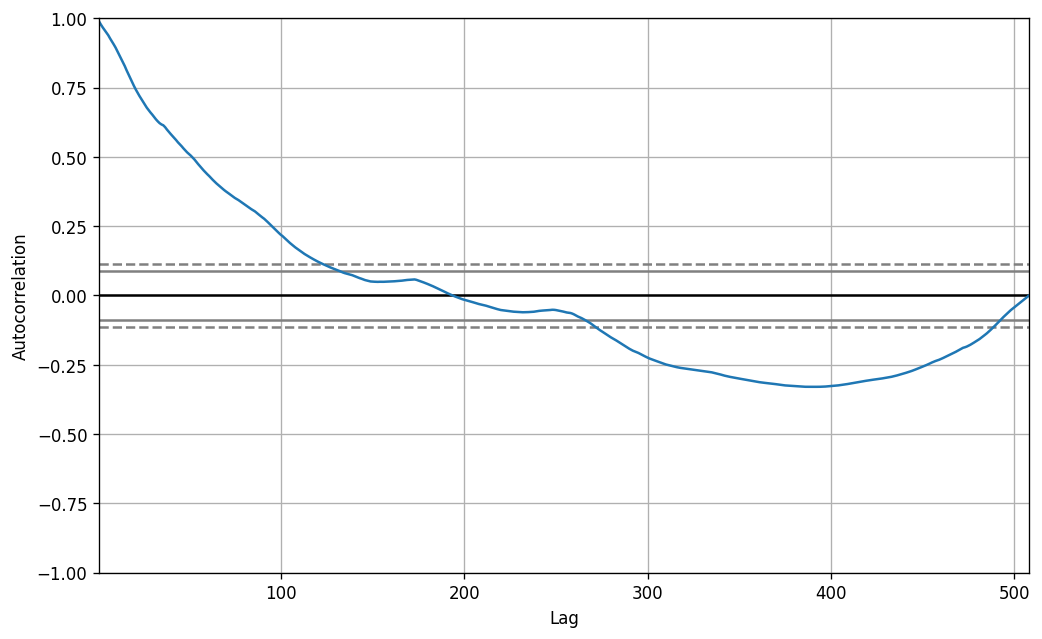

In [48]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(monthly_M2_SP['Low'].tolist())

# Stationarity and test for no White Noise

## Imports

In [49]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [50]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

## Low series

In [51]:
adf_test(monthly_M2_SP['Low'])
kpss_test(monthly_M2_SP['Low'])

Results of Dickey-Fuller Test:
Test Statistic                   1.545220
p-value                          0.997684
#Lags Used                      15.000000
Number of Observations Used    492.000000
Critical Value (1%)             -3.443711
Critical Value (5%)             -2.867432
Critical Value (10%)            -2.569908
dtype: float64
Results of KPSS Test:
Test Statistic            2.967565
p-value                   0.010000
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


Basic series non-stationary

### Log and diff

<Axes: xlabel='Date'>

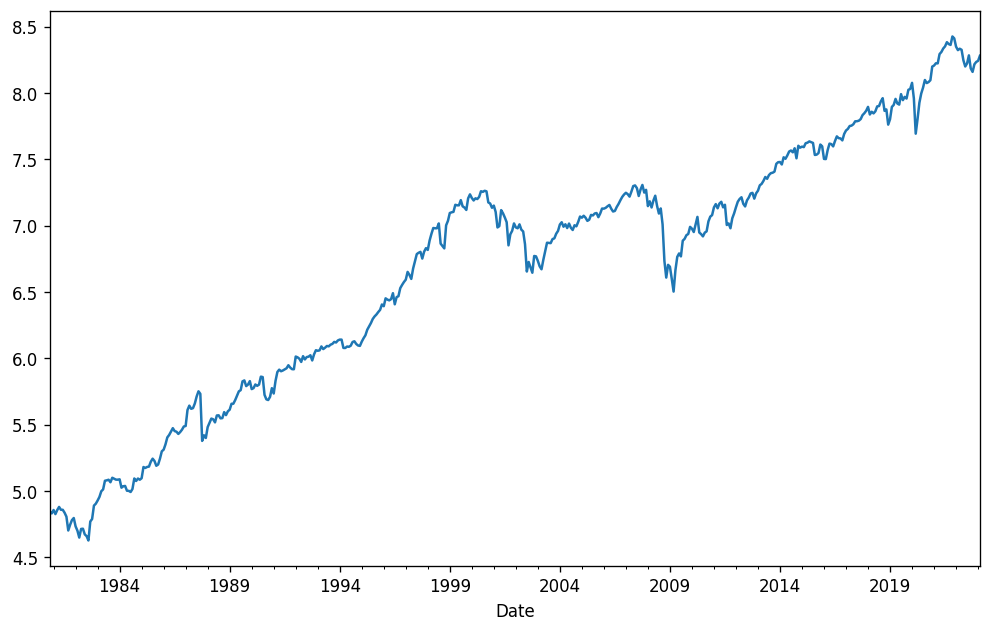

In [52]:
monthly_M2_SP['lnLow'] = np.log(monthly_M2_SP['Low'])
monthly_M2_SP['lnLow'].dropna().plot()

In [53]:
adf_test(monthly_M2_SP['lnLow'])
kpss_test(monthly_M2_SP['lnLow'])

Results of Dickey-Fuller Test:
Test Statistic                  -0.995612
p-value                          0.754861
#Lags Used                       3.000000
Number of Observations Used    504.000000
Critical Value (1%)             -3.443392
Critical Value (5%)             -2.867292
Critical Value (10%)            -2.569833
dtype: float64
Results of KPSS Test:
Test Statistic            3.415841
p-value                   0.010000
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


Both tests show non-stationarity

<Axes: xlabel='Date'>

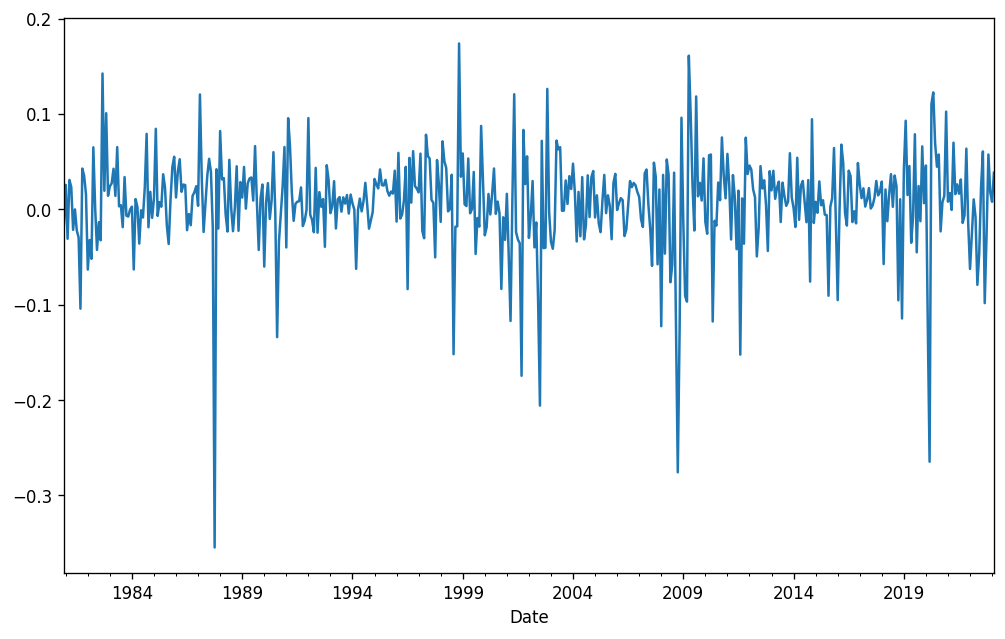

In [54]:
monthly_M2_SP['lnLow_diff1'] = monthly_M2_SP['lnLow']- monthly_M2_SP['lnLow'].shift(1)
monthly_M2_SP['lnLow_diff1'].dropna().plot()

In [55]:
adf_test(monthly_M2_SP['lnLow_diff1'].dropna())
kpss_test(monthly_M2_SP['lnLow_diff1'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.443633e+01
p-value                        7.485135e-27
#Lags Used                     2.000000e+00
Number of Observations Used    5.040000e+02
Critical Value (1%)           -3.443392e+00
Critical Value (5%)           -2.867292e+00
Critical Value (10%)          -2.569833e+00
dtype: float64
Results of KPSS Test:
Test Statistic           0.069069
p-value                  0.100000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


Both tests show stationarity

### Diff once

<Axes: xlabel='Date'>

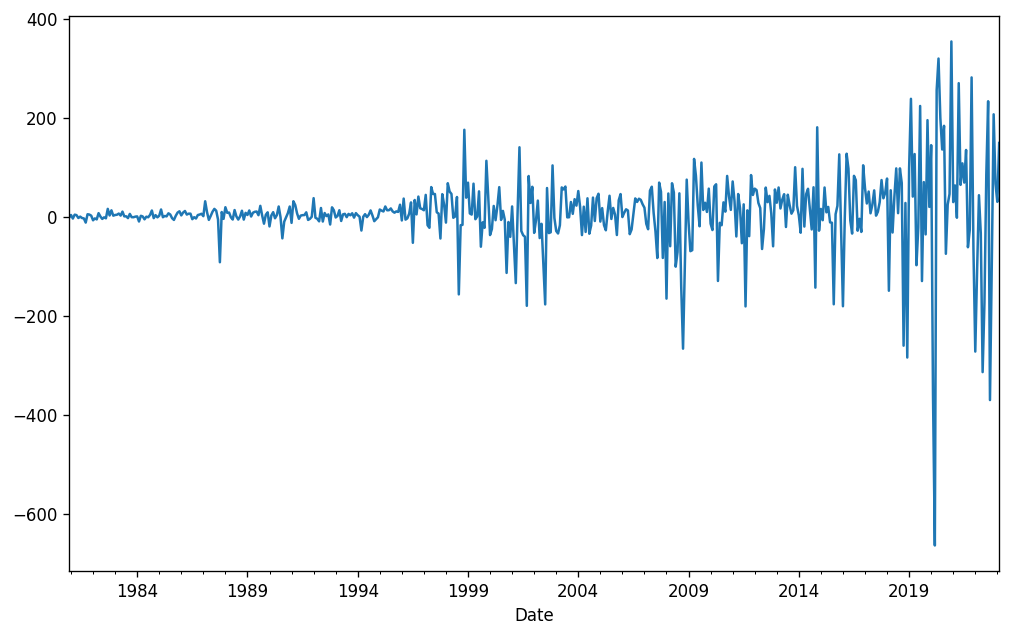

In [56]:
monthly_M2_SP['Low_diff1'] = monthly_M2_SP['Low']- monthly_M2_SP['Low'].shift(1)
monthly_M2_SP['Low_diff1'].dropna().plot()

In [57]:
adf_test(monthly_M2_SP['Low_diff1'].dropna())
kpss_test(monthly_M2_SP['Low_diff1'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -5.803975e+00
p-value                        4.561843e-07
#Lags Used                     1.400000e+01
Number of Observations Used    4.920000e+02
Critical Value (1%)           -3.443711e+00
Critical Value (5%)           -2.867432e+00
Critical Value (10%)          -2.569908e+00
dtype: float64
Results of KPSS Test:
Test Statistic            0.334779
p-value                   0.100000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


### White noise test Ljung-Box

In [58]:
sm.stats.acorr_ljungbox(monthly_M2_SP['Low_diff1'].dropna(), lags=range(1,12), return_df=True)

,lb_stat,lb_pvalue
1,3.212913,0.073059
2,15.476543,0.000436
3,19.148805,0.000255
4,21.869843,0.000213
5,23.531065,0.000267
6,23.590224,0.000621
7,24.068659,0.001108
8,28.948862,0.000324
9,31.589486,0.000234
10,31.611596,0.000465


In [59]:
sm.stats.acorr_ljungbox(monthly_M2_SP['lnLow_diff1'].dropna(), lags=range(1,12), return_df=True)

,lb_stat,lb_pvalue
1,1.838592,0.175116
2,4.347171,0.113769
3,8.612666,0.034910
4,9.563168,0.048465
5,10.490727,0.062466
6,10.532867,0.103932
7,10.892570,0.143374
8,10.910134,0.206843
9,11.556585,0.239476
10,12.859749,0.231620


## High series

In [60]:
adf_test(monthly_M2_SP['High'])
kpss_test(monthly_M2_SP['High'])

Results of Dickey-Fuller Test:
Test Statistic                   2.043027
p-value                          0.998726
#Lags Used                      17.000000
Number of Observations Used    490.000000
Critical Value (1%)             -3.443766
Critical Value (5%)             -2.867457
Critical Value (10%)            -2.569921
dtype: float64
Results of KPSS Test:
Test Statistic            2.942454
p-value                   0.010000
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


Base series non-stationary

### Log and Diff

<Axes: xlabel='Date'>

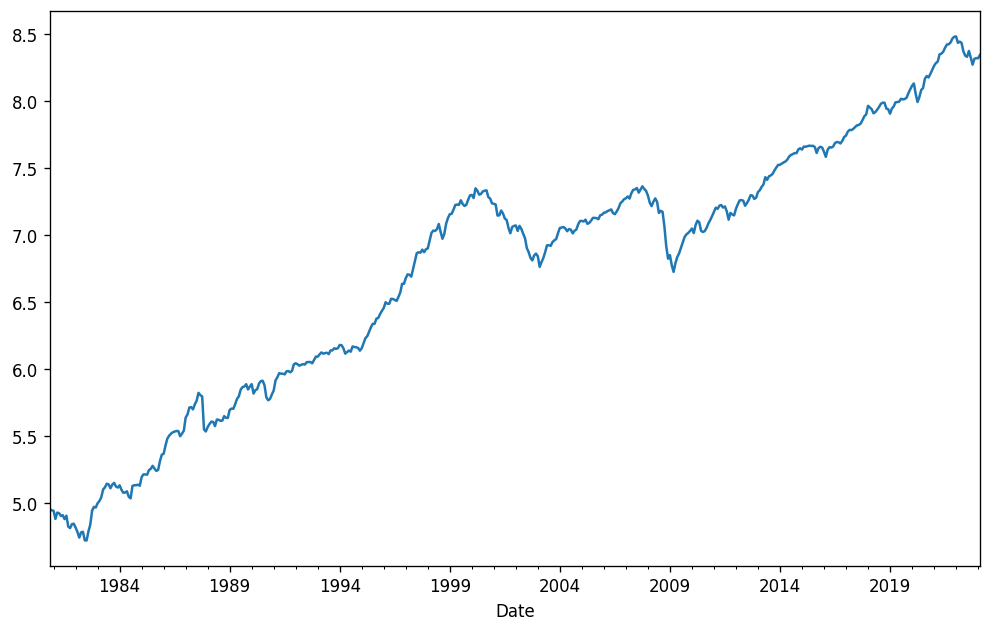

In [61]:
monthly_M2_SP['lnHigh'] = np.log(monthly_M2_SP['High'])
monthly_M2_SP['lnHigh'].dropna().plot()

In [62]:
adf_test(monthly_M2_SP['lnLow'])
kpss_test(monthly_M2_SP['lnLow'])

Results of Dickey-Fuller Test:
Test Statistic                  -0.995612
p-value                          0.754861
#Lags Used                       3.000000
Number of Observations Used    504.000000
Critical Value (1%)             -3.443392
Critical Value (5%)             -2.867292
Critical Value (10%)            -2.569833
dtype: float64
Results of KPSS Test:
Test Statistic            3.415841
p-value                   0.010000
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


Both tests show non-stationarity

<Axes: xlabel='Date'>

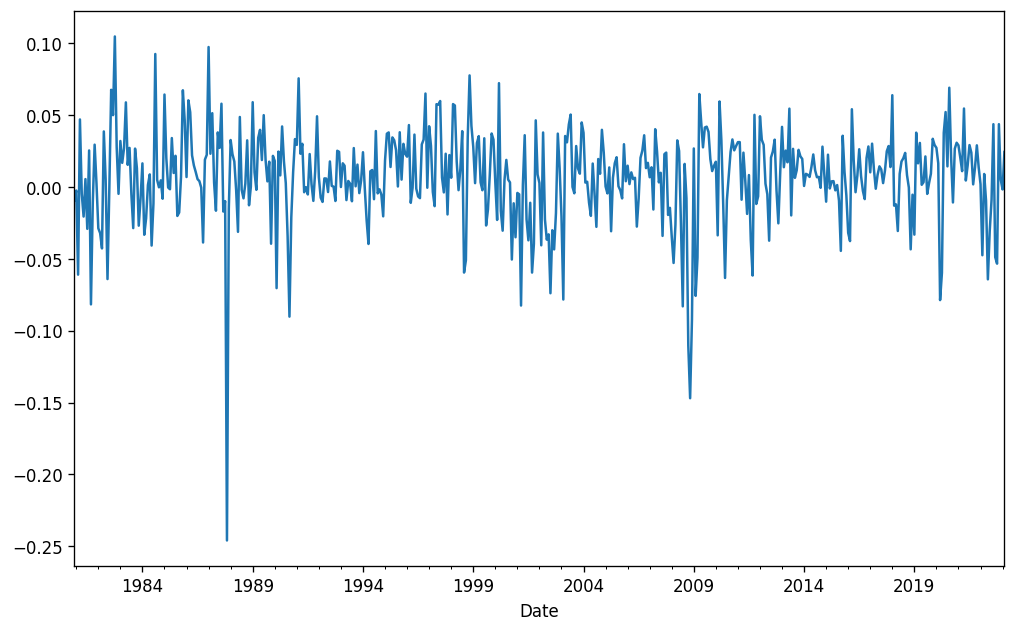

In [63]:
monthly_M2_SP['lnHigh_diff1'] = monthly_M2_SP['lnHigh']- monthly_M2_SP['lnHigh'].shift(1)
monthly_M2_SP['lnHigh_diff1'].dropna().plot()

In [64]:
adf_test(monthly_M2_SP['lnHigh_diff1'].dropna())
kpss_test(monthly_M2_SP['lnHigh_diff1'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.744502e+01
p-value                        4.686562e-30
#Lags Used                     0.000000e+00
Number of Observations Used    5.060000e+02
Critical Value (1%)           -3.443340e+00
Critical Value (5%)           -2.867269e+00
Critical Value (10%)          -2.569821e+00
dtype: float64
Results of KPSS Test:
Test Statistic           0.095232
p-value                  0.100000
Lags Used                5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


Both tests show stationarity

### White noise test Ljung-Box

In [65]:
sm.stats.acorr_ljungbox(monthly_M2_SP['lnHigh_diff1'].dropna(), lags=range(1,12), return_df=True)

,lb_stat,lb_pvalue
1,31.068713,2.490537e-08
2,31.151015,1.720454e-07
3,32.072303,5.053020e-07
4,33.871654,7.917446e-07
5,35.172753,1.389802e-06
6,35.316450,3.741854e-06
7,35.513757,8.952802e-06
8,37.823455,8.115207e-06
9,38.921527,1.190201e-05
10,41.037477,1.111308e-05


## M2 independent variable

In [66]:
adf_test(monthly_M2_SP['M2NS'])
kpss_test(monthly_M2_SP['M2NS'])

Results of Dickey-Fuller Test:
Test Statistic                   2.094424
p-value                          0.998784
#Lags Used                      17.000000
Number of Observations Used    490.000000
Critical Value (1%)             -3.443766
Critical Value (5%)             -2.867457
Critical Value (10%)            -2.569921
dtype: float64
Results of KPSS Test:
Test Statistic            3.208962
p-value                   0.010000
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


ADF shows non-stationary, KPSS shows stationary

<Axes: xlabel='Date'>

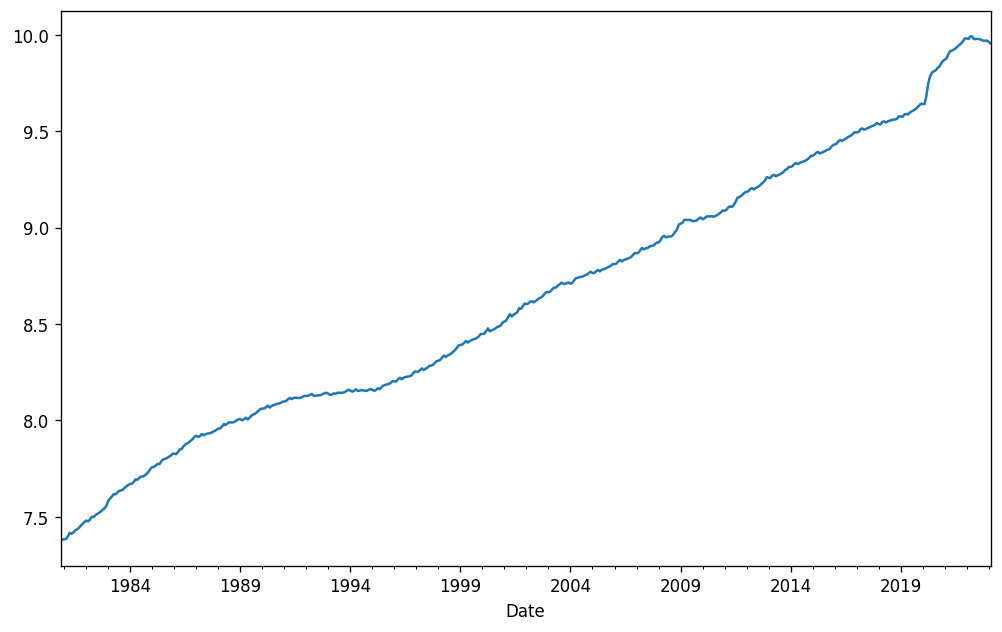

In [67]:
monthly_M2_SP['lnM2NS'] = np.log(monthly_M2_SP['M2NS'])
monthly_M2_SP['lnM2NS'].dropna().plot()

In [68]:
adf_test(monthly_M2_SP['lnM2NS'])
kpss_test(monthly_M2_SP['lnM2NS'])

Results of Dickey-Fuller Test:
Test Statistic                   0.103042
p-value                          0.966268
#Lags Used                      17.000000
Number of Observations Used    490.000000
Critical Value (1%)             -3.443766
Critical Value (5%)             -2.867457
Critical Value (10%)            -2.569921
dtype: float64
Results of KPSS Test:
Test Statistic            3.676115
p-value                   0.010000
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


<Axes: xlabel='Date'>

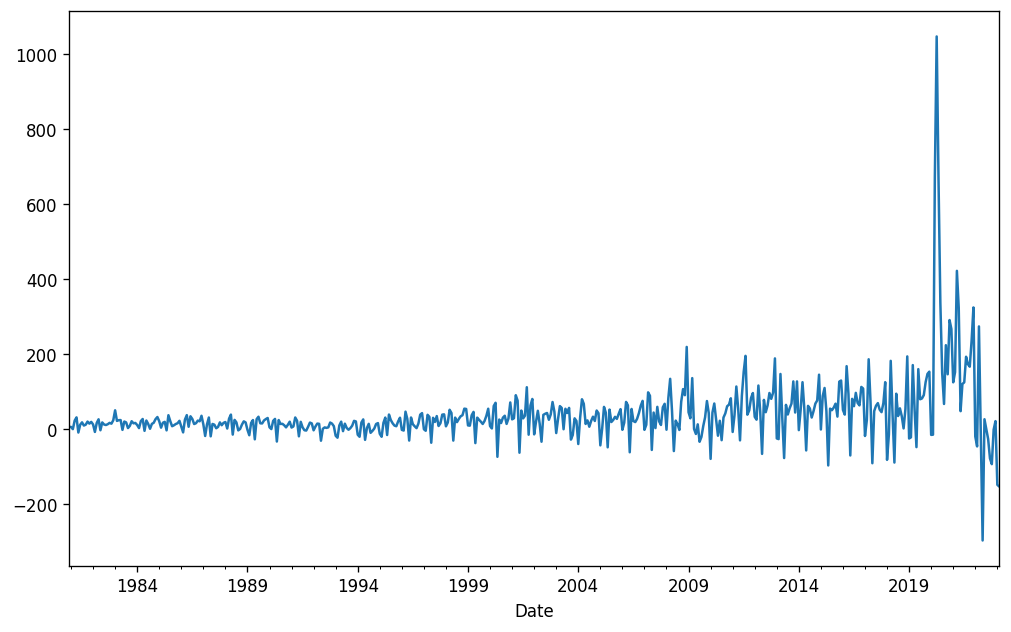

In [69]:
monthly_M2_SP['M2NS_diff1'] = monthly_M2_SP['M2NS']-monthly_M2_SP['M2NS'].shift(1)
monthly_M2_SP['M2NS_diff1'].dropna().plot()

In [70]:
adf_test(monthly_M2_SP['M2NS_diff1'].dropna())
kpss_test(monthly_M2_SP['M2NS_diff1'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -3.646389
p-value                          0.004934
#Lags Used                      16.000000
Number of Observations Used    490.000000
Critical Value (1%)             -3.443766
Critical Value (5%)             -2.867457
Critical Value (10%)            -2.569921
dtype: float64
Results of KPSS Test:
Test Statistic            1.379945
p-value                   0.010000
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


<Axes: xlabel='Date'>

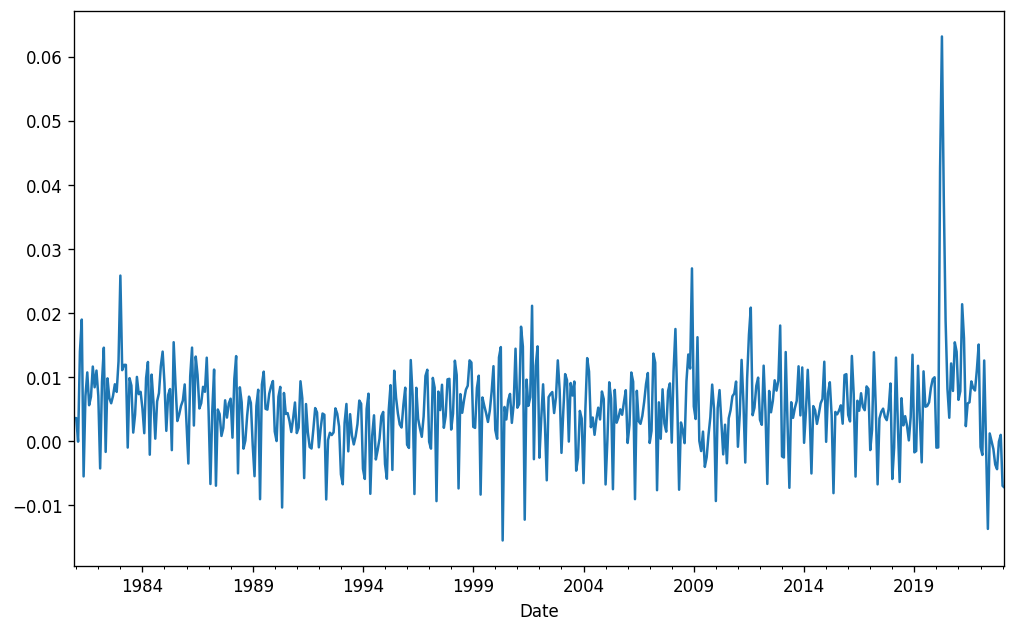

In [71]:
monthly_M2_SP['lnM2NS_diff1'] = monthly_M2_SP['lnM2NS']-monthly_M2_SP['lnM2NS'].shift(1)
monthly_M2_SP['lnM2NS_diff1'].dropna().plot()

In [72]:
adf_test(monthly_M2_SP['lnM2NS_diff1'].dropna())
kpss_test(monthly_M2_SP['lnM2NS_diff1'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -3.972774
p-value                          0.001560
#Lags Used                      16.000000
Number of Observations Used    490.000000
Critical Value (1%)             -3.443766
Critical Value (5%)             -2.867457
Critical Value (10%)            -2.569921
dtype: float64
Results of KPSS Test:
Test Statistic           0.203229
p-value                  0.100000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [73]:
sm.stats.acorr_ljungbox(monthly_M2_SP['lnM2NS_diff1'].dropna(), lags=range(1,12), return_df=True)

,lb_stat,lb_pvalue
1,29.348024,6.047815e-08
2,30.877735,1.972355e-07
3,58.026818,1.551283e-12
4,73.632619,3.877565e-15
5,73.997402,1.505904e-14
6,76.986729,1.495687e-14
7,76.994547,5.639157e-14
8,97.019796,1.733333e-17
9,120.461410,1.074979e-21
10,131.246962,2.600046e-23


Difference of logarithms passes both tests for stationarity

## Stationarity results
High series should be converted to difference of logarithms in order to achieve stationarity and not a white noise

Low series should be differentiated once to achieve stationarity and not a white noise

M2 series should be converted to difference of logarithms in order to achieve stationarity and not a white noise 

# VARMAX

In [74]:
monthly_M2_SP.dropna(inplace=True)

## Choosing p and q

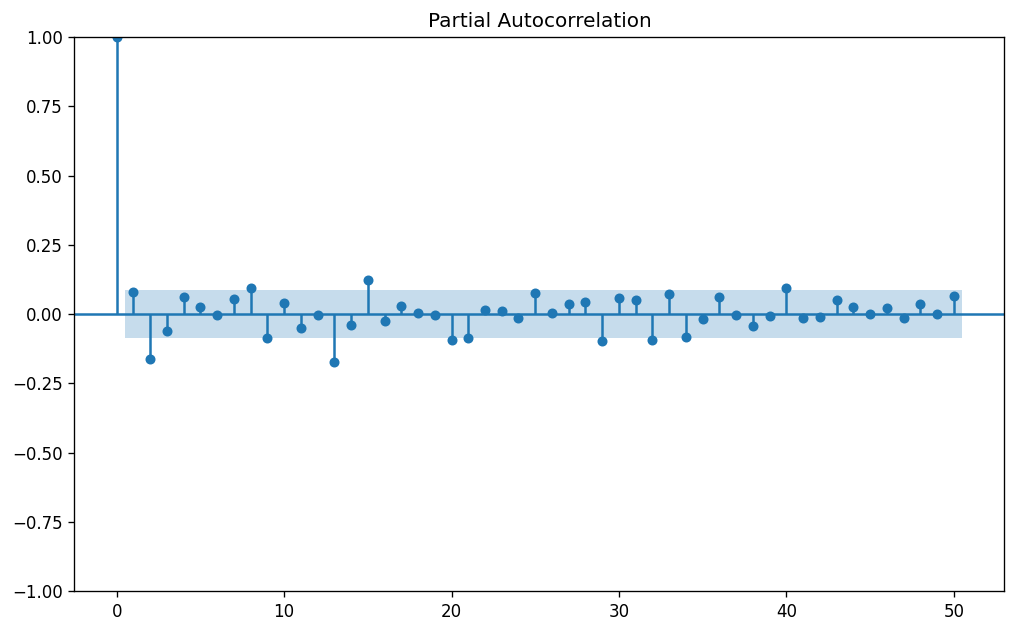

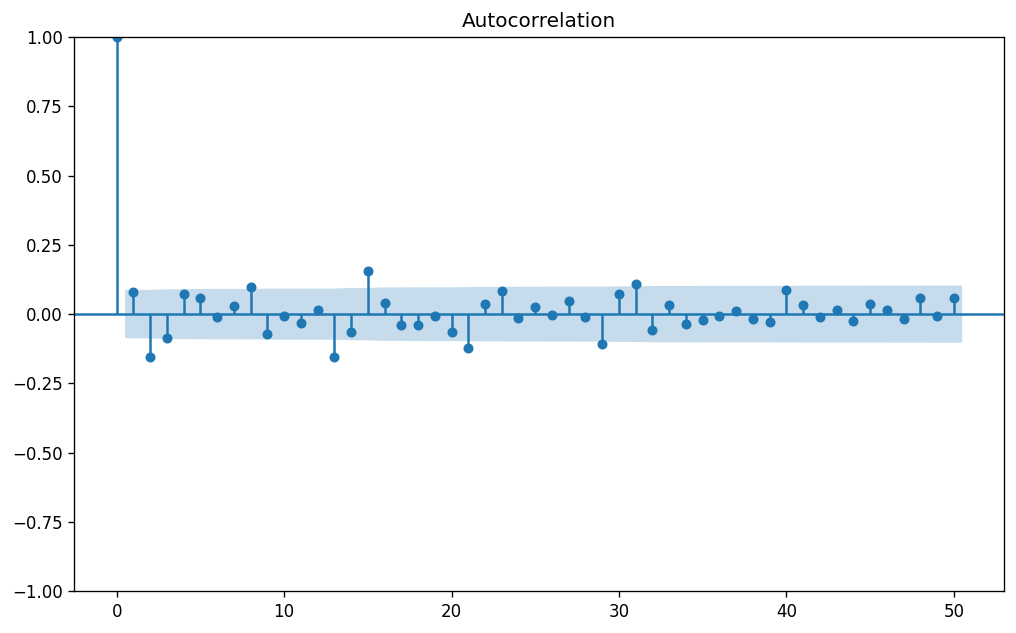

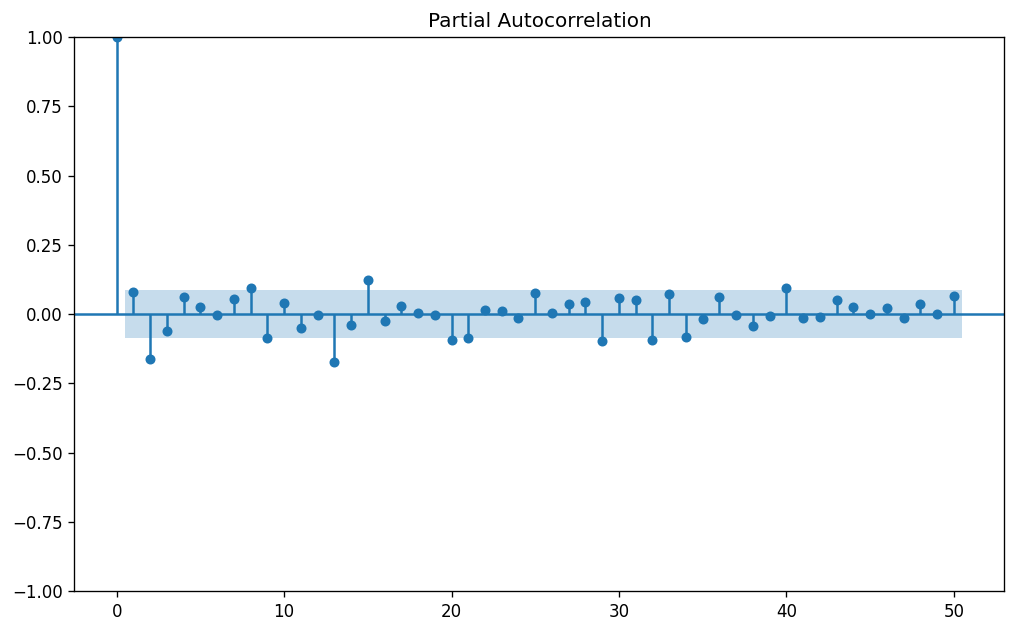

In [75]:
sm.graphics.tsa.plot_acf(monthly_M2_SP["Low_diff1"].values.squeeze(), lags=50)
sm.graphics.tsa.plot_pacf(monthly_M2_SP["Low_diff1"].values.squeeze(), lags=50, method="ywm")

Box-Jenkins p=2 q=3

## Model choice

In [76]:
import itertools
import warnings

In [86]:

p = range(0,6)
q = range(0,6)
# for already differentiated series
pq = list(itertools.product(p, q))

We use train set without last 12 months and test set last 12 months

In [87]:
warnings.filterwarnings("ignore")
varmax_comparison = pd.DataFrame(columns=['p','q','AIC','BIC'])
for param in pq[1:]:
    try: 
        mod = sm.tsa.VARMAX(endog=monthly_M2_SP[['Low_diff1','lnHigh_diff1']][:-12],\
                                        exog=monthly_M2_SP['lnM2NS_diff1'][:-12],
                                        trend='n',
                                        order=param)

        results = mod.fit(maxiter=1000)
        varmax_comparison.loc[len(varmax_comparison.index)] = [param[0],param[1],results.aic,results.bic]
    except:
        varmax_comparison.loc[len(varmax_comparison.index)] = [param[0],param[1],None,None]
        print(f"Error for p {param[0]}, q{param[1]}")
    varmax_comparison.to_csv('./data/outputs/varmax_comparison_M2_SP.csv')
    print(f"Iteration finished for {param}")

Iteration finished for (0, 1)
Iteration finished for (0, 2)
Iteration finished for (0, 3)
Iteration finished for (0, 4)
Iteration finished for (0, 5)
Iteration finished for (1, 0)
Iteration finished for (1, 1)
Iteration finished for (1, 2)
Iteration finished for (1, 3)
Iteration finished for (1, 4)
Iteration finished for (1, 5)
Iteration finished for (2, 0)
Iteration finished for (2, 1)
Iteration finished for (2, 2)
Iteration finished for (2, 3)
Iteration finished for (2, 4)
Iteration finished for (2, 5)
Iteration finished for (3, 0)
Iteration finished for (3, 1)
Iteration finished for (3, 2)
Iteration finished for (3, 3)
Iteration finished for (3, 4)
Iteration finished for (3, 5)
Iteration finished for (4, 0)
Iteration finished for (4, 1)
Iteration finished for (4, 2)
Iteration finished for (4, 3)
Iteration finished for (4, 4)
Iteration finished for (4, 5)
Iteration finished for (5, 0)
Iteration finished for (5, 1)
Iteration finished for (5, 2)
Iteration finished for (5, 3)
Iteration 

In [101]:
# varmax_comparison.to_csv('./data/outputs/varmax_comparison_M2_SP.csv')
varmax_comparison.sort_values(by=['AIC']).head()


,p,q,AIC,BIC
14,2.0,3.0,3518.436653,3623.550597
17,3.0,0.0,3520.314934,3591.792416
8,1.0,3.0,3521.223718,3609.519431
13,2.0,2.0,3523.716539,3612.012252
23,4.0,0.0,3523.980295,3612.276008


# Final Model and summary

Basing on AIC we choose p=2 and q=3

In [102]:
mod = sm.tsa.VARMAX(endog=monthly_M2_SP[['Low_diff1','lnHigh_diff1']][:-12],\
                                        exog=monthly_M2_SP['lnM2NS_diff1'][:-12],
                                        trend='n',
                                        order=(2,3))

results = mod.fit(maxiter=10000)
print(results.summary())

                                 Statespace Model Results                                
Dep. Variable:     ['Low_diff1', 'lnHigh_diff1']   No. Observations:                  495
Model:                               VARMAX(2,3)   Log Likelihood               -1734.218
Date:                           Sat, 22 Apr 2023   AIC                           3518.437
Time:                                   19:43:32   BIC                           3623.551
Sample:                               12-01-1980   HQIC                          3559.701
                                    - 02-01-2022                                         
Covariance Type:                             opg                                         
Ljung-Box (L1) (Q):             0.40, 0.00   Jarque-Bera (JB):    10414.49, 3218.68
Prob(Q):                        0.53, 0.95   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):        32.93, 0.47   Skew:                     -2.37, -1.20
Prob(H) (two-sided):        

In [103]:
for table in results.summary().tables:
    print('#################################################')
    print(table.as_latex_tabular())

#################################################
\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}   & ['Low\_diff1', 'lnHigh\_diff1'] & \textbf{  No. Observations:  } &    495     \\
\textbf{Model:}           &           VARMAX(2,3)           & \textbf{  Log Likelihood     } & -1734.218  \\
\textbf{Date:}            &         Sat, 22 Apr 2023        & \textbf{  AIC                } &  3518.437  \\
\textbf{Time:}            &             19:43:32            & \textbf{  BIC                } &  3623.551  \\
\textbf{Sample:}          &            12-01-1980           & \textbf{  HQIC               } &  3559.701  \\
\textbf{}                 &           - 02-01-2022          & \textbf{                     } &            \\
\textbf{Covariance Type:} &               opg               & \textbf{                     } &            \\
\bottomrule
\end{tabular}
%\caption{Statespace Model Results}
\end{center}
#################################################
\begin{center}
\

# Prediction

In [165]:
frcst = results.forecast(steps=12, exog=monthly_M2_SP['lnM2NS_diff1'][-12:])
frcst['Low'] = monthly_M2_SP['Low'][-13] + np.cumsum(frcst['Low_diff1'])
frcst['High'] = np.exp(monthly_M2_SP["lnHigh"][-13] + np.cumsum(frcst['lnHigh_diff1']))
frcst

,Low_diff1,lnHigh_diff1
2022-03-01,34.469903,-0.005164
2022-04-01,22.907416,0.011710
2022-05-01,-22.154372,0.007000
2022-06-01,-33.675635,0.006259
2022-07-01,-36.182579,0.004498
2022-08-01,-37.781494,0.003077
2022-09-01,-39.955659,0.001353
2022-10-01,-42.169058,-0.000218
2022-11-01,-40.766224,-0.000926
2022-12-01,-37.259785,-0.001485


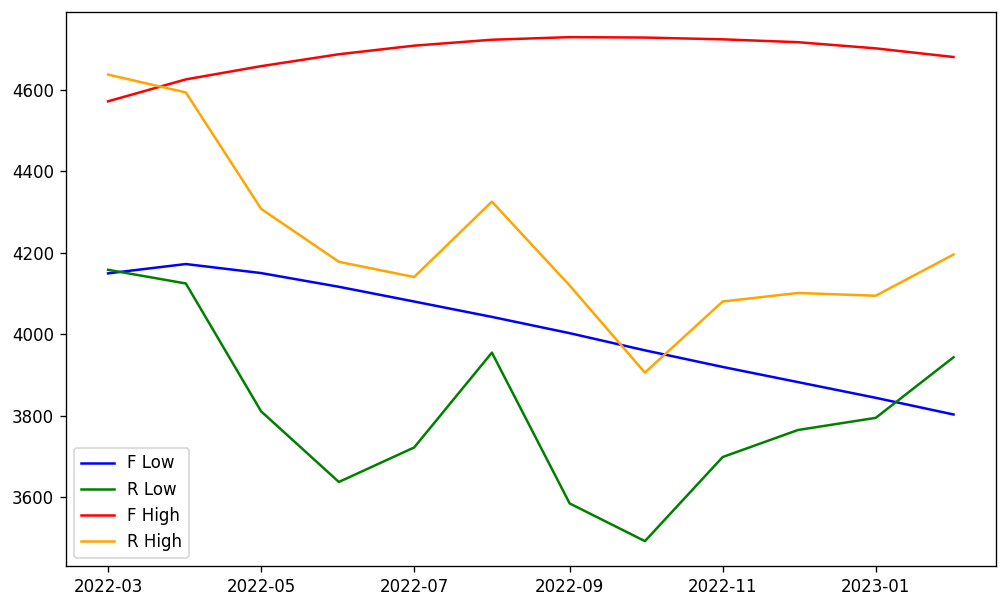

In [163]:
fig, ax = plt.subplots()
ax.plot(frcst['Low'], "b", label="F Low")
ax.plot(monthly_M2_SP['Low'][-12:], "g", label="R Low")
ax.plot(frcst['High'], "r", label="F High")
ax.plot(monthly_M2_SP['High'][-12:], "orange", label="R High")
ax.legend(loc="best")

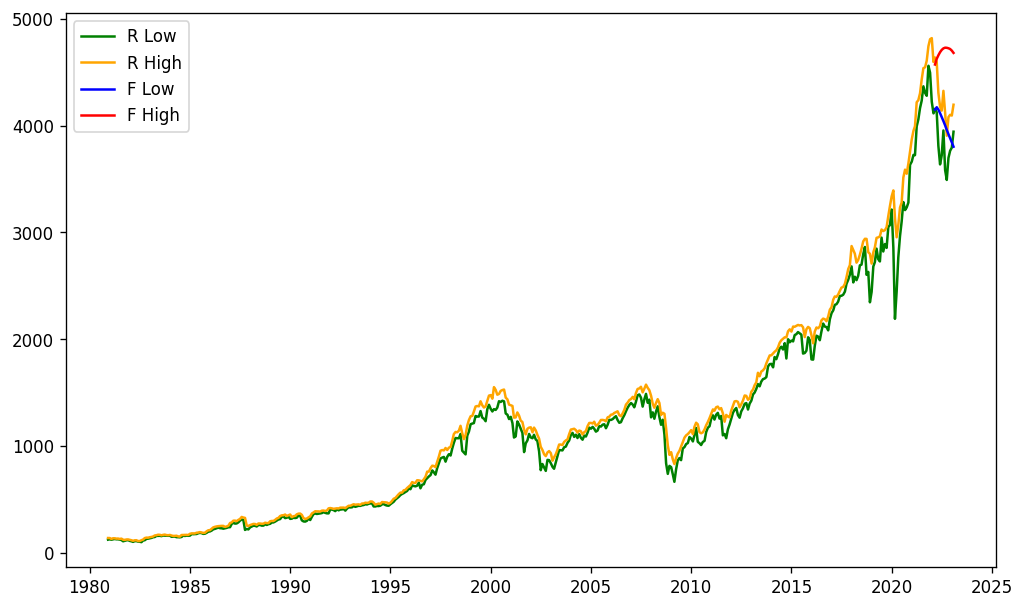

In [162]:
fig, ax = plt.subplots()
ax.plot(monthly_M2_SP['Low'], "g", label="R Low")
ax.plot(monthly_M2_SP['High'], "orange", label="R High")
ax.plot(frcst['Low'], "b", label="F Low")
ax.plot(frcst['High'], "r", label="F High")
ax.legend(loc="best")

In [159]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def MAPE(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true)) * 100

In [160]:
print("########### Low ###########")
print('MRSE ', mean_squared_error(monthly_M2_SP['Low'][-12:],frcst['Low']))
print('MAE ', mean_absolute_error(monthly_M2_SP['Low'][-12:],frcst['Low']))
print('MAPE ', MAPE(monthly_M2_SP['Low'][-12:],frcst['Low']))
print("########### High ###########")
print('MRSE ', mean_squared_error(monthly_M2_SP['High'][-12:],frcst['High']))
print('MAE ', mean_absolute_error(monthly_M2_SP['High'][-12:],frcst['High']))
print('MAPE ', MAPE(monthly_M2_SP['High'][-12:],frcst['High']))

########### Low ###########
MRSE  80239.52801997618
MAE  228.05992302330878
MAPE  6.196638513116251
########### High ###########
MRSE  276322.6523074981
MAE  475.702338081429
MAPE  11.536127156992055
